In [1]:
#!pip install tensorflow-gpu==2.0.0b1
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

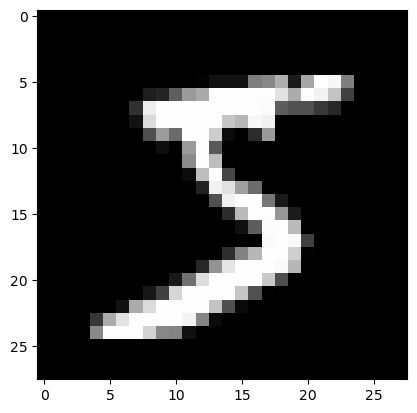

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
LATENT_SIZE = 32
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE, activation="sigmoid"),
])

In [5]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [6]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

In [ ]:
EPOCHS = 1000
#Only do plotting if you have IPython, Jupyter, or using Colab
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize=(4,4))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train, batch_size = 64)

In [8]:
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input, Reshape, Conv2DTranspose, BatchNormalization

In [9]:
inp = Input((28, 28,1))
e = Conv2D(32, (3, 3), activation='relu')(inp)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(64, (3, 3), activation='relu')(e)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(64, (3, 3), activation='relu')(e)
l = Flatten()(e)
latent = Dense(49, activation='softmax')(l) #

d = Reshape((7,7,1))(latent)
d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(d)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d)
encoder = Model(inp, latent)
autoencoder = Model(inp, decoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          3692

In [10]:
autoencoder.compile(optimizer = 'adam', loss = 'mse')

In [11]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 170s 361ms/step - loss: 0.0263 - val_loss: 0.0866
Epoch 2/5
469/469 [==============================] - 170s 364ms/step - loss: 0.0117 - val_loss: 0.0105
Epoch 3/5
469/469 [==============================] - 173s 369ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 4/5
469/469 [==============================] - 173s 369ms/step - loss: 0.0092 - val_loss: 0.0171
Epoch 5/5
469/469 [==============================] - 167s 357ms/step - loss: 0.0086 - val_loss: 0.0112


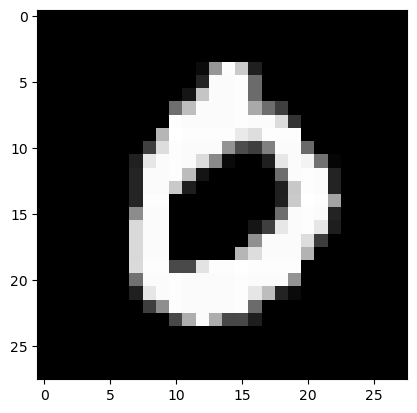

In [12]:
image = x_test[3].reshape((28,28))
plt.imshow(image)
plt.gray()

In [13]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 8s 25ms/step


In [14]:
decoded_imgs.shape

(10000, 28, 28, 1)

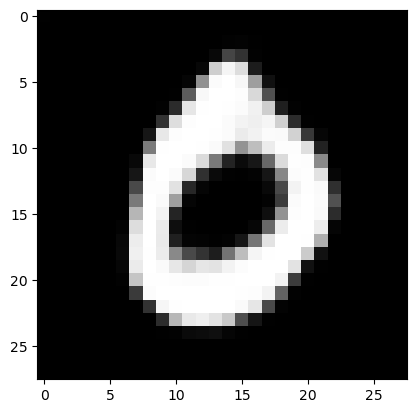

In [15]:
test_img = decoded_imgs[3].reshape((28,28))
plt.imshow(test_img)
plt.gray()

In [16]:
train_vectors = encoder.predict(x_train)
test_vectors = encoder.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [17]:
train_vectors.shape

(60000, 49)

In [18]:
train_vectors[0]

array([0.02107845, 0.03005992, 0.03200901, 0.02597611, 0.02384833,
       0.02097121, 0.02175434, 0.02609554, 0.01045236, 0.00832899,
       0.0086065 , 0.00817321, 0.00899012, 0.02146853, 0.02398276,
       0.0187969 , 0.01005867, 0.01492291, 0.02701253, 0.02790806,
       0.02338811, 0.02509428, 0.03038602, 0.01270068, 0.01081897,
       0.01214694, 0.02383695, 0.02405414, 0.01947514, 0.02537215,
       0.02331444, 0.0141502 , 0.00638224, 0.0201191 , 0.0333176 ,
       0.01796046, 0.01059938, 0.00598512, 0.01164213, 0.02567989,
       0.0215751 , 0.01581553, 0.01536887, 0.01600289, 0.02284955,
       0.03323378, 0.02491467, 0.01706176, 0.06625952], dtype=float32)

In [19]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(train_vectors, y_train)

SVC()

In [20]:
pred = clf.predict(test_vectors)

In [23]:
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [21]:
from sklearn.metrics import accuracy_score
print(f'accuracy score:',accuracy_score(y_test,pred))

accuracy score: 0.9785


In [22]:
y_test.shape

(10000,)

In [24]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)